In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# yf stands for yfinance, the library's name.
# Ticker is a function in yfinance that gets data about a specific stock or index.
# '^GSPC' is the symbol for the S&P 500 index.
# Volume: This is the total number of shares that were traded during the day. 
# For example, if the volume is 1 million,
# it means 1 million shares of that stock or units of that index were bought and sold during the day.

In [3]:
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,0.0,0.0
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,0.0,0.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,0.0,0.0


In [4]:
sp500.index = sp500.index.strftime('%Y-%m-%d')

In [5]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24110 entries, 1927-12-30 to 2023-12-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24110 non-null  float64
 1   High          24110 non-null  float64
 2   Low           24110 non-null  float64
 3   Close         24110 non-null  float64
 4   Volume        24110 non-null  int64  
 5   Dividends     24110 non-null  float64
 6   Stock Splits  24110 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5+ MB


In [6]:
sp500.index

Index(['1927-12-30', '1928-01-03', '1928-01-04', '1928-01-05', '1928-01-06',
       '1928-01-09', '1928-01-10', '1928-01-11', '1928-01-12', '1928-01-13',
       ...
       '2023-12-08', '2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14',
       '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21'],
      dtype='object', name='Date', length=24110)

<Axes: xlabel='Date'>

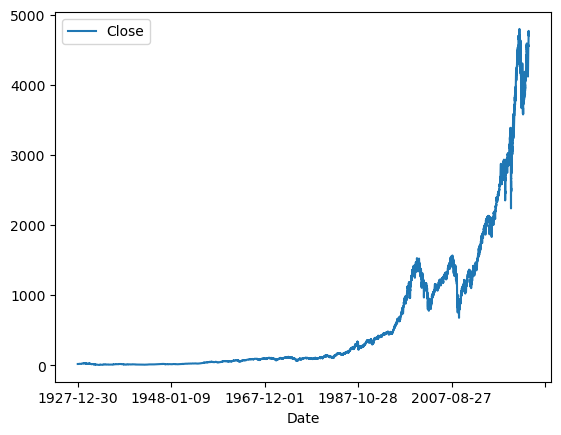

In [7]:
sp500.plot.line(y='Close', use_index=True)

In [8]:
sp500.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [9]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059
2023-12-18,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117
2023-12-19,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098


In [10]:
sp500['Tomorrow'] > sp500['Close']

Date
1927-12-30     True
1928-01-03    False
1928-01-04    False
1928-01-05     True
1928-01-06    False
              ...  
2023-12-15     True
2023-12-18     True
2023-12-19    False
2023-12-20     True
2023-12-21    False
Length: 24110, dtype: bool

In [11]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1
2023-12-18,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1
2023-12-19,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0


In [12]:
sp500 = sp500.loc['1990-01-01':].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1
2023-12-18,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1
2023-12-19,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0


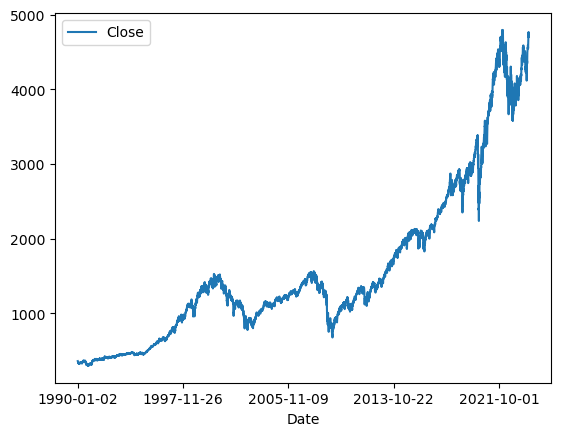

In [13]:
sp500.plot.line(y='Close', use_index=True);

In [14]:
# by Time series data it is a bad idea to use cross validation.
#  You can’t just mix up the days randomly.
# and data leakage can be if you split your data randomly

In [15]:
from sklearn.ensemble import RandomForestClassifier  # It is good against overfitting

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500[:-100]
test = sp500[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [17]:
preds = pd.DataFrame(preds, index=test.index)
preds

,0
Date,
2023-08-02,1
2023-08-03,0
2023-08-04,1
2023-08-07,1
2023-08-08,1
...,...
2023-12-15,0
2023-12-18,0
2023-12-19,0


In [18]:
precision_score(test['Target'], preds)

0.5211267605633803

In [19]:
combined = pd.concat([test['Target'], preds], axis=1)
combined

,Target,0
Date,,
2023-08-02,0,1
2023-08-03,0,0
2023-08-04,1,1
2023-08-07,0,1
2023-08-08,0,1
...,...,...
2023-12-15,1,0
2023-12-18,1,0
2023-12-19,0,0


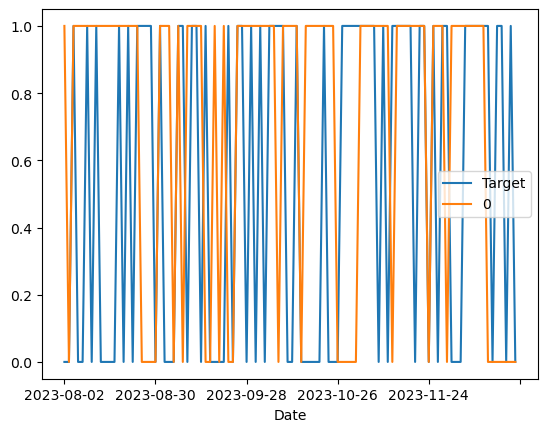

In [20]:
combined.plot();

In [21]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [22]:
def backtest(data, model, predictors,start = 2500, step = 250):  # in a year there are 250 work days and in 10 years = 2500
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [23]:
predictions = backtest(sp500, model, predictors)

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

In [24]:
predictions

,Target,Predictions
Date,,
1999-11-22,0,0
1999-11-23,1,0
1999-11-24,0,0
1999-11-26,0,0
1999-11-29,0,0
...,...,...
2023-12-15,1,0
2023-12-18,1,0
2023-12-19,0,0


In [25]:
predictions['Predictions'].value_counts()

Predictions
0    3464
1    2596
Name: count, dtype: int64

In [26]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5288906009244992

In [27]:
predictions['Target'].value_counts()

Target
1    3238
0    2822
Name: count, dtype: int64

In [28]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.534323
0    0.465677
Name: count, dtype: float64

In [29]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']

    new_predictors += [ratio_column, trend_column]

In [30]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1,0.999962,1.0,1.007858,4.0,1.071470,36.0,1.110293,134.0,1.192454,528.0
2023-12-18,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1,1.002259,1.0,1.007340,4.0,1.074613,37.0,1.114353,135.0,1.197400,528.0
2023-12-19,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0,1.002925,2.0,1.007909,4.0,1.079160,37.0,1.119893,135.0,1.203954,529.0


In [31]:
sp500 = sp500.dropna()
sp500 # that begins afters 3 years than previos dataframe

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-14,4721.040039,4738.569824,4694.339844,4719.549805,6314040000,4719.189941,0,1.001322,2.0,1.012903,5.0,1.073133,36.0,1.111284,134.0,1.192991,529.0
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1,0.999962,1.0,1.007858,4.0,1.071470,36.0,1.110293,134.0,1.192454,528.0
2023-12-18,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1,1.002259,1.0,1.007340,4.0,1.074613,37.0,1.114353,135.0,1.197400,528.0


# improve out model

In [32]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [33]:
predictions = backtest(sp500, model, new_predictors)
predictions

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

,Target,Predictions
Date,,
2003-11-14,0,0.0
2003-11-17,0,0.0
2003-11-18,1,0.0
2003-11-19,0,0.0
2003-11-20,1,1.0
...,...,...
2023-12-14,0,0.0
2023-12-15,1,0.0
2023-12-18,1,0.0


In [34]:
predictions['Predictions'].value_counts()

Predictions
0.0    4366
1.0     693
Name: count, dtype: int64

In [35]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5670995670995671

In [37]:
# done
# maybe I can try woth another ML models like xgboost or SVM